In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/kkhandekar/electric-vehicles-india")

Skipping, found downloaded files in ".\electric-vehicles-india" (use force=True to force download)


In [5]:
df=pd.read_csv("electric-vehicles-india/EVIndia.csv")
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


## Preprocessing

In [6]:
def Preprocess1(df,old_col):
#     old_col=old_col[0]
    df[old_col]=df[old_col].replace("na","0 L")
    bootspace=df[old_col].str.split("L",n=1,expand=True)
    df[old_col+"_new"]=bootspace[0]
    df[old_col+"_new"]=df[old_col+"_new"].astype(int)
    df[old_col+"_new"].mean()
    df[old_col+"_new"]=df[old_col+"_new"].replace(0,df["BootSpace_new"].mean())
    df=pd.DataFrame(df)
    return df     

In [7]:
df=Preprocess1(df,"BootSpace")
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,BootSpace_new
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,350.00
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,316.00
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,448.00
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,0 L,Premium Dual Tone,HSE,313.75
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55,656.00
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na,405.00
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,580.00
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,0 L,na,na,313.75
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,0 L,na,na,313.75


In [8]:
df['PriceRange']=df['PriceRange'].replace(['₹ 1.8 Cr','₹ 1.16 Cr','₹ 1.06 - 1.12 Cr','₹ 1 Cr','₹ 1.5 Cr','₹ 1.01 - 1.19 Cr'],['₹ 180 L','₹ 116 L','₹ 106 - 112 L','₹ 100 L','₹ 150 L','₹ 101 - 119 L'])
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,BootSpace_new
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,350.00
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,316.00
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,448.00
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,0 L,Premium Dual Tone,HSE,313.75
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 106 - 112 L,5 Seater,656 L,S,Sportback 55,656.00
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 180 L,5 Seater,405 L,Quattro,na,405.00
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,580.00
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 100 L,5 Seater,0 L,na,na,313.75
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 116 L,5 Seater,0 L,na,na,313.75


In [9]:
price=df['PriceRange'].str.split('₹',n=1,expand=True)
price=price[1].str.split('-',n=1,expand=True)
st_price,fi_price=price[0],price[1]
st_price=st_price.str.split('L',n=1,expand=True)
df['StartingPrice(in Lakh)']=st_price[0].str.split('L',n=1,expand=True)
fi_price=fi_price.str.split('L',n=1,expand=True)
df['FinalPrice(in Lakh)']=fi_price[0].str.split('L',n=1,expand=True)
df['StartingPrice(in Lakh)']=df['StartingPrice(in Lakh)'].astype(float)
df['FinalPrice(in Lakh)']=df['FinalPrice(in Lakh)'].astype(float)

In [10]:
df['Range']=df['Range'].replace('na','0 Km/Full Charge')
df[['Range','Unit']]=df['Range'].str.split(' ',n=1,expand=True)
df=df.drop(['Unit'],axis=1)
# df['Range']=df['Range'].replace("na",0)
df['Range']=df['Range'].astype(int)


In [11]:
df.columns=['Car', 'Style', 'Range(per Km)', 'Transmission', 'VehicleType', 'PriceRange',
       'Capacity', 'BootSpace', 'BaseModel', 'TopModel', 'BootSpace_new',
       'StartingPrice(in Lakh)', 'FinalPrice(in Lakh)']

In [12]:
df

,Car,Style,Range(per Km),Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,BootSpace_new,StartingPrice(in Lakh),FinalPrice(in Lakh)
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,350.00,13.99,17.40
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,316.00,12.49,13.64
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00,17.74,19.24
3,MG ZS EV,Compact SUV,419,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,448.00,21.99,25.88
4,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,0 L,Premium Dual Tone,HSE,313.75,23.79,23.98
5,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,₹ 106 - 112 L,5 Seater,656 L,S,Sportback 55,656.00,106.00,112.00
6,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,₹ 180 L,5 Seater,405 L,Quattro,na,405.00,180.00,NaN
7,BYD E6,Subcompact MPV,415,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,580.00,29.15,NaN
8,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,₹ 100 L,5 Seater,0 L,na,na,313.75,100.00,NaN
9,BMW iX,Premium Fullsize SUV,425,Automatic,Electric,₹ 116 L,5 Seater,0 L,na,na,313.75,116.00,NaN


In [13]:
df.drop(['PriceRange','BootSpace'],axis=1,inplace=True)
df

,Car,Style,Range(per Km),Transmission,VehicleType,Capacity,BaseModel,TopModel,BootSpace_new,StartingPrice(in Lakh),FinalPrice(in Lakh)
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,5 Seater,XM,Dark XZ Plus LUX,350.00,13.99,17.40
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,5 Seater,XE,XZ Plus Dual Tone,316.00,12.49,13.64
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,5 Seater,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,350.00,17.74,19.24
3,MG ZS EV,Compact SUV,419,Automatic,Electric,5 Seater,Excite,Exclusive,448.00,21.99,25.88
4,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,5 Seater,Premium Dual Tone,HSE,313.75,23.79,23.98
5,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,5 Seater,S,Sportback 55,656.00,106.00,112.00
6,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,5 Seater,Quattro,na,405.00,180.00,NaN
7,BYD E6,Subcompact MPV,415,Automatic,Electric,5 Seater,STD,na,580.00,29.15,NaN
8,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,5 Seater,na,na,313.75,100.00,NaN
9,BMW iX,Premium Fullsize SUV,425,Automatic,Electric,5 Seater,na,na,313.75,116.00,NaN


In [14]:
df['FinalPrice(in Lakh)']=df['FinalPrice(in Lakh)'].fillna(0.0)

In [15]:
type(df['StartingPrice(in Lakh)'][0])

numpy.float64

## Visualization

In [16]:
style=df['Style'].value_counts()
style

Compact SUV              6
Subcompact Sedan         1
Premium Midsize Sedan    1
Premium Coupe            1
Subcompact MPV           1
Premium Fullsize SUV     1
Premium Sports Sedan     1
Name: Style, dtype: int64

In [17]:
# con=style.index
# count_plot('Style',df,con,"Style Distribution")

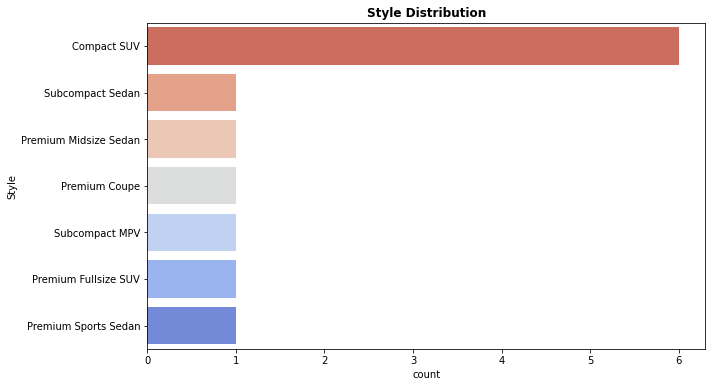

In [18]:
def count_plot(col,df,con,title):
    plt.figure(figsize=(10,6))
    sb.countplot(y='Style',data=df,order=con,palette='coolwarm_r')
    plt.title(title,{'fontweight':'bold','fontsize':'larger'})
    plt.show()
con=style.index
count_plot('Style',df,con,"Style Distribution")

In [19]:
range_style=df.groupby('Style')['Range(per Km)'].mean()

Text(0, 0.5, 'Range(per Km)')

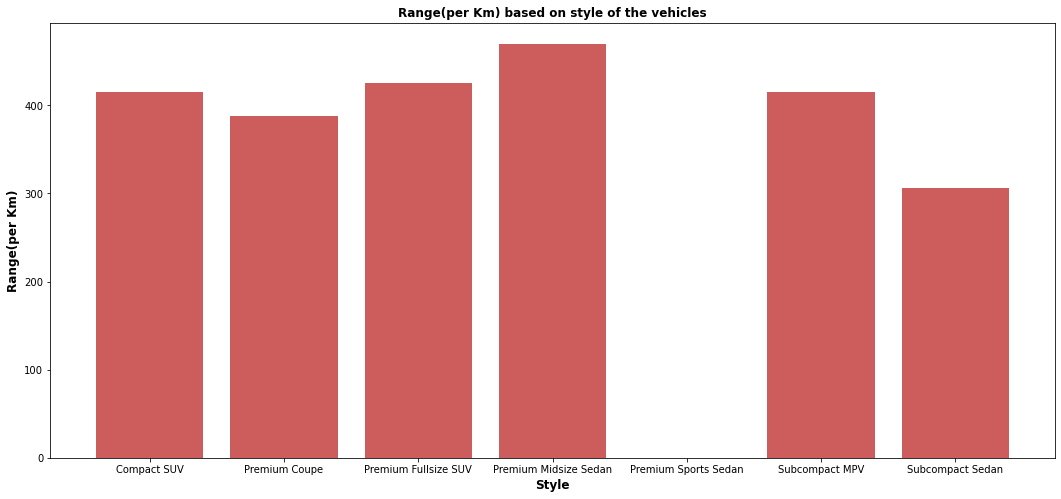

In [20]:
plt.figure(figsize=(18,8))
# sb.barplot(x=range_style.index,y=range_style.values)
# plt.barh(y=range_style.index,width=range_style.values,color='#CD5C5C')
plt.bar(x=range_style.index,height=range_style.values,color='#CD5C5C')
plt.title('Range(per Km) based on style of the vehicles',{'fontweight':'bold','fontsize':'larger'})
plt.xlabel("Style",{'fontweight':'bold','fontsize':'larger'})
plt.ylabel("Range(per Km)",{'fontweight':'bold','fontsize':'larger'})

In [24]:
df.groupby(['Style','Car'])['StartingPrice(in Lakh)'].max()

Style                  Car                  
Compact SUV            Audi E-Tron              101.00
                       Hyundai Kona Electric     23.79
                       MG ZS EV                  21.99
                       Mercedes-Benz EQC        100.00
                       Tata Nexon EV             13.99
                       Tata Nexon EV Max         17.74
Premium Coupe          Audi E-Tron GT           180.00
Premium Fullsize SUV   BMW iX                   116.00
Premium Midsize Sedan  Jaguar I-Pace            106.00
Premium Sports Sedan   Porsche Taycan           150.00
Subcompact MPV         BYD E6                    29.15
Subcompact Sedan       Tata Tigor EV             12.49
Name: StartingPrice(in Lakh), dtype: float64

In [28]:
start_price=df.groupby('Style')['StartingPrice(in Lakh)'].mean()

Text(0, 0.5, 'Starting Price(in Lakh)')

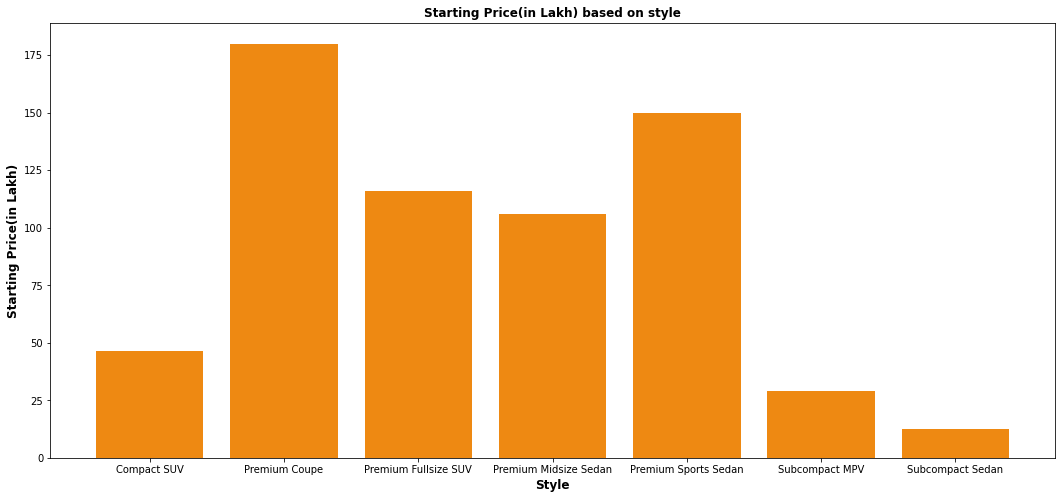

In [32]:
plt.figure(figsize=(18,8))
# sb.barplot(x=range_style.index,y=range_style.values)
# plt.barh(y=range_style.index,width=range_style.values,color='#CD5C5C')
plt.bar(x=start_price.index,height=start_price.values,color='#EE8912')
plt.title('Starting Price(in Lakh) based on style',{'fontweight':'bold','fontsize':'larger'})
plt.xlabel("Style",{'fontweight':'bold','fontsize':'larger'})
plt.ylabel("Starting Price(in Lakh)",{'fontweight':'bold','fontsize':'larger'})

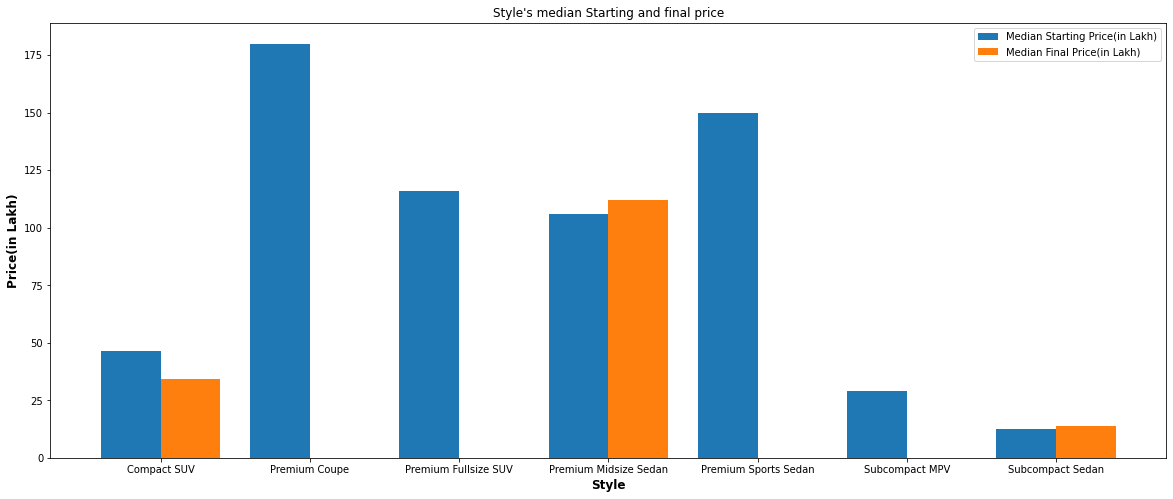

In [54]:
X = list(final_price.index)

start = list(start_price.values)
final = list(final_price.values)
  
X_axis = np.arange(len(X))
plt.figure(figsize=(20,8)) 
plt.bar(X_axis - 0.2, start, 0.4, label = 'Median Starting Price(in Lakh)')
plt.bar(X_axis + 0.2, final, 0.4, label = 'Median Final Price(in Lakh)')
  
plt.xticks(X_axis, X)
plt.xlabel("Style",{'fontweight':'bold','fontsize':'larger'})
plt.ylabel("Price(in Lakh)",{'fontweight':'bold','fontsize':'larger'})
plt.title("Style's median Starting and final price")
plt.legend()
plt.show()

In [4]:
data=pd.read_csv('alternative-fuel-stations-in-new-york.csv')
# data.head(10)
data_new=data

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Georeference,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2
0,ELEC,Village of Sodus,14-16 Mill St,Enter municipal lot from Main or Gaylord Streets,Sodus,NY,14551,NaN,315-483-9821,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-77.061621, ...",628.0,408.0,631.0
1,ELEC,DeNooyer Chevrolet,127 Wolf Rd,NaN,Albany,NY,12205,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.806317, ...",834.0,42.0,2030.0
2,ELEC,BRUNSWICK HD BRUNSWICK HD2,1130 Hoosick Rd,NaN,Troy,NY,12180,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.60228, 4...",130.0,11.0,2138.0
3,ELEC,AL SIGL WOLK,1600 South Ave,NaN,Rochester,NY,14620,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-77.61388, 4...",537.0,1679.0,2093.0
4,ELEC,LaGrangeville Tops Market,16 John J Wagner Way,NaN,LaGrangeville,NY,12540,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.795294, ...",594.0,979.0,2040.0
5,ELEC,Hatchet Hardware of Waterford,42 Saratoga Ave,NaN,Waterford,NY,12188,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.696148, ...",992.0,18.0,2030.0
6,ELEC,LANDMARK ALBANY LANDMARK ALBANY,100 Sandidge Way,NaN,Albany,NY,12203,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.83313, 4...",814.0,40.0,2030.0
7,ELEC,BP CENTEREACH,3117 Nesconset Hwy,NaN,Centereach,NY,11720,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.097965, ...",1022.0,1077.0,2179.0
8,ELEC,NATIONAL GRID JEFFERSON 2,1220 Coffeen street,NaN,Watertown,NY,13601,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-75.932725, ...",841.0,1466.0,2089.0
9,ELEC,Rapidpark 9-11 W 100th Street - Tesla Destination,9 W 100th St,NaN,New York,NY,10024,NaN,212-531-4228 877-798-3752,E,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.963228, ...",749.0,752.0,2095.0


In [19]:
col=['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP',
       'Station Phone', 'Status Code',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Open Date',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Groups With Access Code (French)',
       'Access Code', 'Access Detail Code',
       'Facility Type', 'EV Pricing', 'Georeference',
       'NYS Municipal Boundaries 2', 'New York Zip Codes 2', 'Counties 2']


In [20]:
data_new=data_new[col]

In [21]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    2697 non-null   object 
 1   Station Name                      2697 non-null   object 
 2   Street Address                    2697 non-null   object 
 3   Intersection Directions           134 non-null    object 
 4   City                              2697 non-null   object 
 5   State                             2697 non-null   object 
 6   ZIP                               2697 non-null   int64  
 7   Station Phone                     2673 non-null   object 
 8   Status Code                       2697 non-null   object 
 9   Groups With Access Code           2697 non-null   object 
 10  Access Days Time                  2695 non-null   object 
 11  Cards Accepted                    242 non-null    object 
 12  EV Lev

In [22]:
data_new.head(10)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,...,Country,Groups With Access Code (French),Access Code,Access Detail Code,Facility Type,EV Pricing,Georeference,NYS Municipal Boundaries 2,New York Zip Codes 2,Counties 2
0,ELEC,Village of Sodus,14-16 Mill St,Enter municipal lot from Main or Gaylord Streets,Sodus,NY,14551,315-483-9821,E,Public,...,US,Public,public,NaN,MUNI_GOV,Free,"{'type': 'Point', 'coordinates': [-77.061621, ...",628.0,408.0,631.0
1,ELEC,DeNooyer Chevrolet,127 Wolf Rd,NaN,Albany,NY,12205,NaN,E,Public - Call ahead,...,US,Public - Appeler à l'avance,public,CALL,CAR_DEALER,Free,"{'type': 'Point', 'coordinates': [-73.806317, ...",834.0,42.0,2030.0
2,ELEC,BRUNSWICK HD BRUNSWICK HD2,1130 Hoosick Rd,NaN,Troy,NY,12180,888-758-4389,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.60228, 4...",130.0,11.0,2138.0
3,ELEC,AL SIGL WOLK,1600 South Ave,NaN,Rochester,NY,14620,888-758-4389,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-77.61388, 4...",537.0,1679.0,2093.0
4,ELEC,LaGrangeville Tops Market,16 John J Wagner Way,NaN,LaGrangeville,NY,12540,855-900-7584,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.795294, ...",594.0,979.0,2040.0
5,ELEC,Hatchet Hardware of Waterford,42 Saratoga Ave,NaN,Waterford,NY,12188,888-356-8911,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.696148, ...",992.0,18.0,2030.0
6,ELEC,LANDMARK ALBANY LANDMARK ALBANY,100 Sandidge Way,NaN,Albany,NY,12203,888-758-4389,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.83313, 4...",814.0,40.0,2030.0
7,ELEC,BP CENTEREACH,3117 Nesconset Hwy,NaN,Centereach,NY,11720,888-758-4389,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-73.097965, ...",1022.0,1077.0,2179.0
8,ELEC,NATIONAL GRID JEFFERSON 2,1220 Coffeen street,NaN,Watertown,NY,13601,888-758-4389,E,Public,...,US,Public,public,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-75.932725, ...",841.0,1466.0,2089.0
9,ELEC,Rapidpark 9-11 W 100th Street - Tesla Destination,9 W 100th St,NaN,New York,NY,10024,212-531-4228 877-798-3752,E,Public,...,US,Public,public,NaN,PAY_GARAGE,Free,"{'type': 'Point', 'coordinates': [-73.963228, ...",749.0,752.0,2095.0


In [24]:
data_new['EV Pricing'].value_counts()

Free                                                                                  626
Level 2: $0.59 per kWh                                                                 74
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW     49
FREE                                                                                   12
$0.10 per kWh                                                                           8
$1.50 per hour                                                                          7
$0.18 per hour                                                                          6
$4.39 per week                                                                          5
$0.25 per kWh                                                                           4
Free; donations encouraged                                                              2
$3.33 per hour                                                                          1
$1.50-$5.0